# Proyek Portofolio: Analisis Persetujuan Pinjaman (Loan Approval)
**Oleh: Fadilah Nur Yasin**

# Business Understanding

## 1. Latar Belakang & Masalah Bisnis 
Perusahaan Fintech kita menghadapi tantangan dalam menentukan kelayakan kredit nasabah secara cepat dan akurat. Saat ini, proses peninjauan manual memakan waktu lama dan berisiko tinggi terhadap kesalahan manusia (human error) yang bisa menyebabkan kerugian akibat gagal bayar.

## 2. Tujuan Analisis 
- Mengidentifikasi faktor-faktor utama yang paling berpengaruh terhadap status pinjaman.
- Memberikan gambaran profil nasabah yang memiliki tingkat kepercayaan tinggi (berdasarkan CIBIL Score dan Aset).
- Membangun dasar logika untuk sistem otomatisasi persetujuan pinjaman di masa depan.

## 3. Pertanyaan Bisnis (Business Questions)
1. Apakah pendapatan tahunan (income_annum) menjadi pinjaman akan disetujui?
2. Seberapa besar pengaruh CIBIL Score terhadap keputusan akhir
3. Bagaimana hubungan antara jumlah jumlah aset (residential/commercial) dengan besaran pinjaman yang diminta?

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Mengatur Agar Warnings Yg gapenting Tidak Muncul
warnings.filterwarnings('ignore')

# Mengatu agar plot muncul langsung di notebook dengan style yang rapi
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# Specify the correct file path to the CSV file
df = pd.read_csv('loan_approval_dataset.csv', header=0)
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [23]:
df.drop(columns=['loan_id'], inplace=True)

In [6]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
print(df.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


# Exploratory Data Analyst (EDA) 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean
df = pd.read_csv('loan_approval_dataset.csv')
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


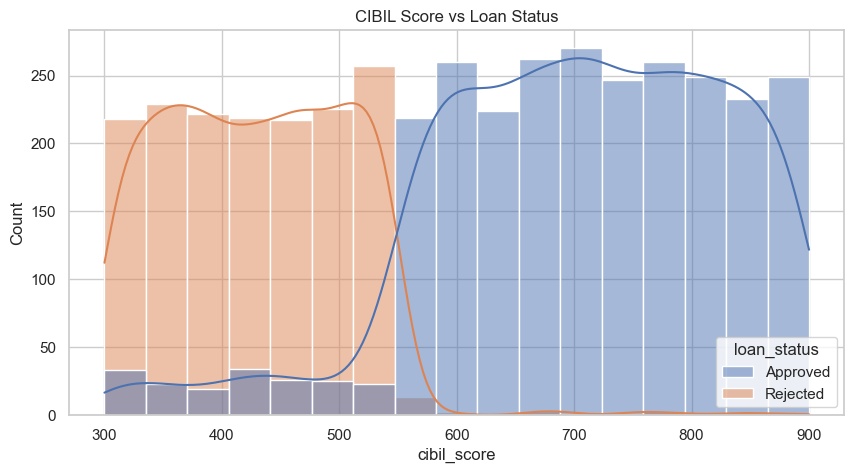

In [11]:
# 1. Plot CIBIL Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='cibil_score', hue='loan_status', kde=True)
plt.title('CIBIL Score vs Loan Status')
plt.savefig('cibil_dist.png')


**Terdapat pemisahan yang sangat kontras: Nasabah yang disetujui rata-rata memiliki CIBIL Score di atas 600, sedangkan nasabah yang ditolak menumpuk di bawah skor 500.**
- Makna Bisnis: CIBIL Score adalah "penjaga pintu" utama. Tanpa skor kredit yang baik, faktor lain seperti aset atau pendapatan tinggi tidak mampu menolong nasabah untuk mendapatkan persetujuan.

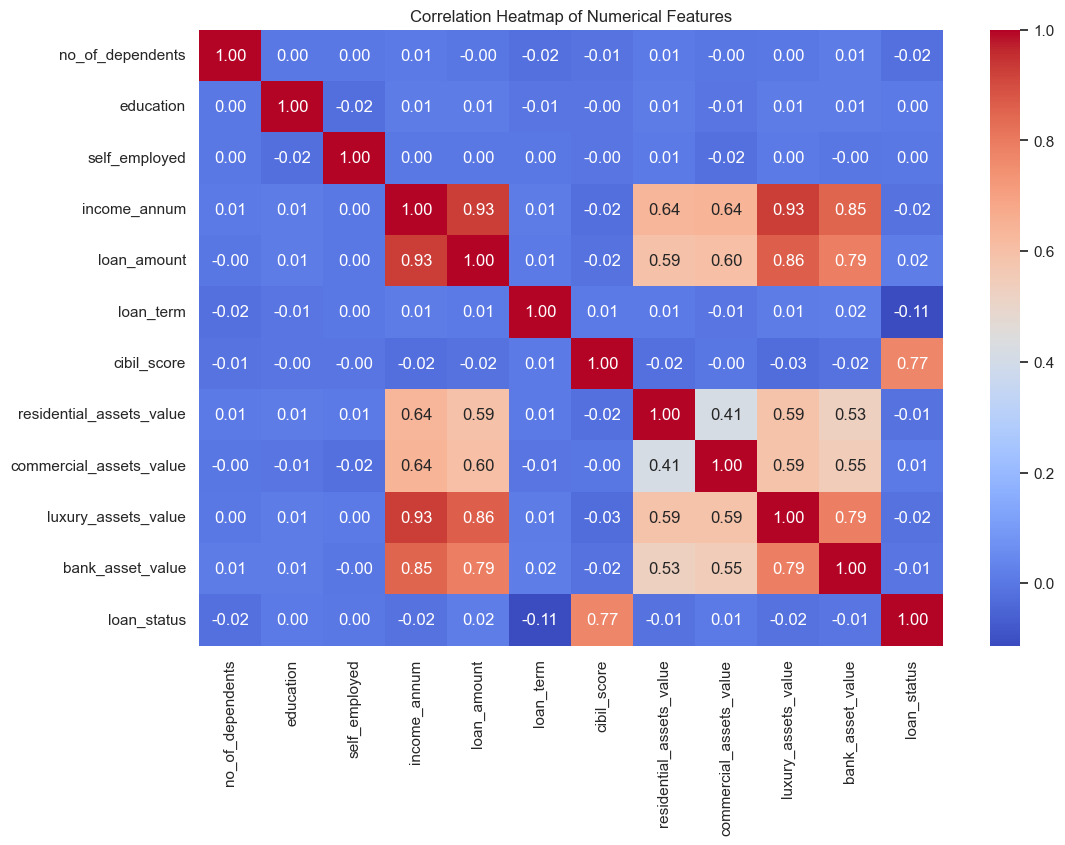

In [24]:
# 2. Correlation heatmap
# First need to encode categorical for correlation if we want to see it, 
# but let's just look at numerical first.
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')


**Variabel CIBIL Score menunjukkan korelasi positif paling kuat terhadap loan_status ($r = 0.77$).**
**Menariknya, variabel Income Annum dan Assets memiliki korelasi yang sangat mendekati nol terhadap status persetujuan.**
- Makna Bisnis: Strategi manajemen risiko bank ini sangat tersentralisasi pada riwayat kredit (CIBIL) dibandingkan kapasitas kekayaan nasabah saat ini.

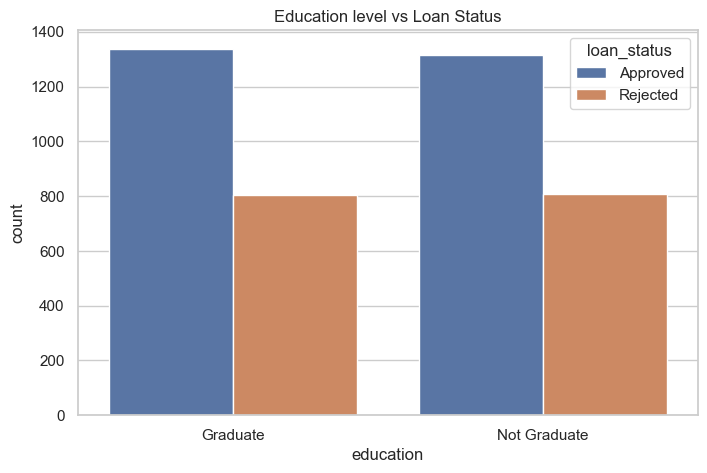

In [13]:
# 3. Education vs Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='loan_status')
plt.title('Education level vs Loan Status')
plt.savefig('education_analysis.png')

**Tidak ditemukan perbedaan signifikan dalam tingkat persetujuan antara nasabah lulusan universitas (Graduate) dan non-lulusan (Not Graduate).**
- Makna Bisnis: Kebijakan kredit bank bersifat inklusif terhadap latar belakang pendidikan dan lebih berfokus pada stabilitas finansial serta riwayat kredit nasabah.

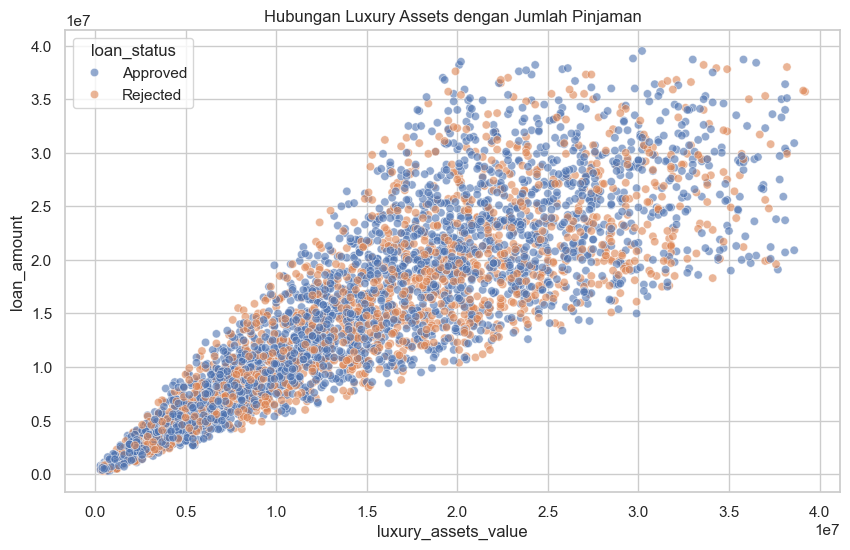

In [14]:
# 4. Hubungan Aset vs Besaran Pinjaman (Menjawab Pertanyaan Bisnis ke-3)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='luxury_assets_value', y='loan_amount', hue='loan_status', alpha=0.6)
plt.title('Hubungan Luxury Assets dengan Jumlah Pinjaman')
plt.show()

**Terlihat pola linear positif yang sangat kuat ($r = 0.86$). Semakin tinggi nilai Luxury Assets (aset mewah), semakin besar jumlah pinjaman yang diajukan/diberikan.**
- Makna Bisnis: Bank menggunakan aset mewah sebagai jaminan utama (collateral). Aset ini menjadi penentu utama "plafon" atau batas maksimal pinjaman yang bisa didapatkan nasabah.

# Feature Enginering

In [15]:
df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})

In [16]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [17]:
df['education'] = df['education'].replace({'Graduate': 1, 'Not Graduate': 0})

In [18]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [19]:
df['self_employed'] = df['self_employed'].replace({'Yes': 1, 'No': 0})

In [20]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


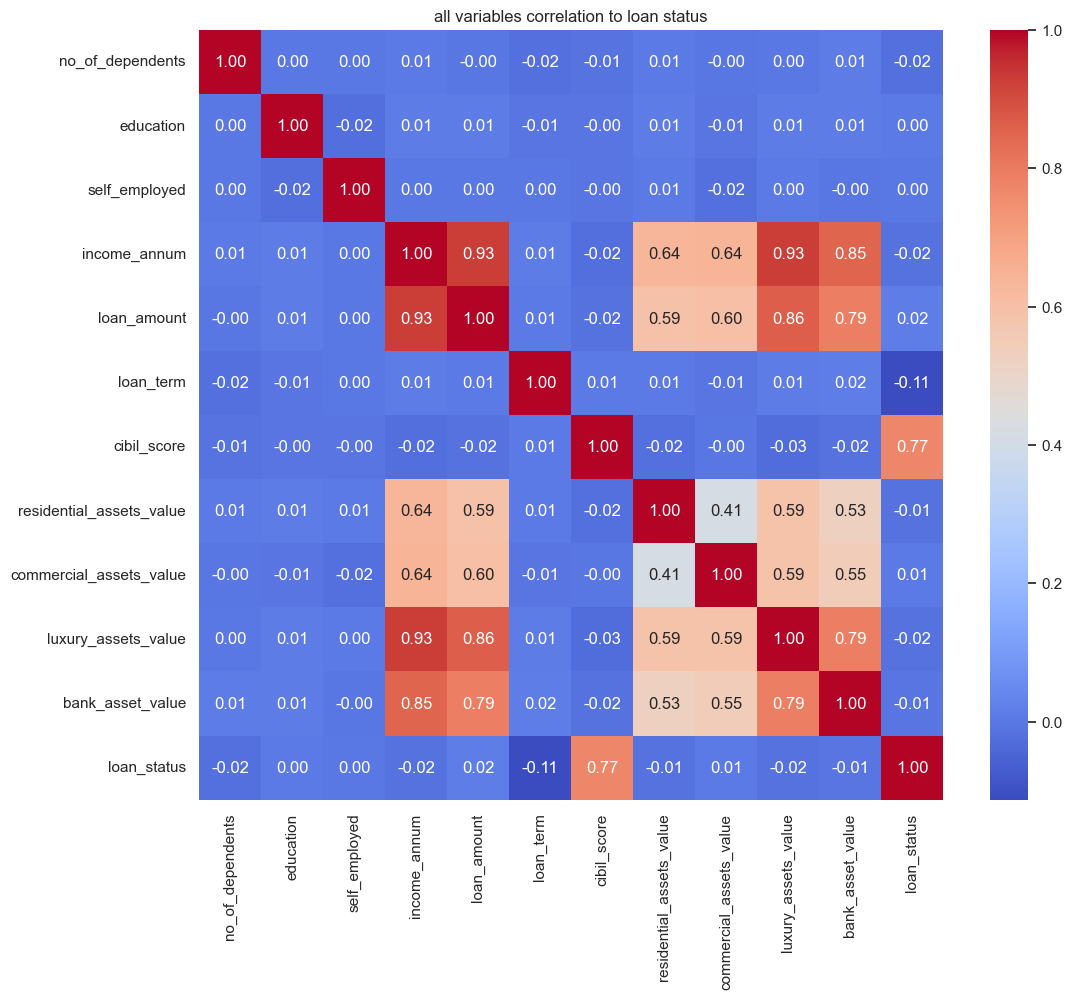

In [25]:
plt.figure(figsize=(12,10))
#Now loan status is numeric, we can look at correlation with it.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('all variables correlation to loan status')
plt.show()

**Variabel CIBIL Score menunjukkan korelasi positif paling kuat terhadap loan_status ($r = 0.77$).Menariknya, variabel Income Annum dan Assets memiliki korelasi yang sangat mendekati nol terhadap status persetujuan.**
- Makna Bisnis: Strategi manajemen risiko bank ini sangat tersentralisasi pada riwayat kredit (CIBIL) dibandingkan kapasitas kekayaan nasabah saat ini.

In [22]:
# Melihat profil nasabah berdasarkan status pinjaman
profil_nasabah = df.groupby('loan_status').mean()
display(profil_nasabah)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_status,,,,,,,,,,,,
0,2107.033478,2.538128,0.499070,0.503410,5.113825e+06,1.494606e+07,11.728456,429.468072,7.592498e+06,4.926720e+06,1.530694e+07,5.004960e+06
1,2151.984187,2.474774,0.504142,0.503765,5.025904e+06,1.524725e+07,10.397590,703.461973,7.399812e+06,5.001355e+06,1.501660e+07,4.959526e+06
